<a href="https://colab.research.google.com/github/Aishhh3105/Diwali-Sales-Data-Analysis-Using-Python/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
df = pd.read_csv("/content/Diwali Sales Data Python.csv")
df.shape

(11251, 15)

In [106]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)     #axis=1 : means we are dropping columns     #axis=0 : means we are dropping rows
 #inplace=True means we are making changes to the original data

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [10]:
#check for null values
pd.isnull(df).sum()
#if we wrote only pd.isnull(df) then it will show us all the False and true values for each data cell in the table..
#it will not show us the number of how many null or missing value are present in the data..therefor we add sum() at the end

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [11]:
#drop null values
df.dropna(inplace=True)

In [12]:
df.shape

(11239, 13)

In [13]:
#change datatype
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtype

dtype('int64')

In [19]:
#rename a column
df.rename(columns = {'Marital_Status': 'Shadi', 'Gender':'M&F'})

,User_ID,Cust_name,Product_ID,M&F,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [20]:
#describe() method gives the count, mean, std, etc of the numeric columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [21]:
#using describe() for specific columns
df[['Age', 'Amount', 'Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


### **EXPLORATORY DATA ANALYSIS**

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

GENDER


<ipython-input-24-14b5eb37b869>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x = 'Gender', data=df, palette=['red', 'blue'])


<Axes: xlabel='Gender', ylabel='count'>

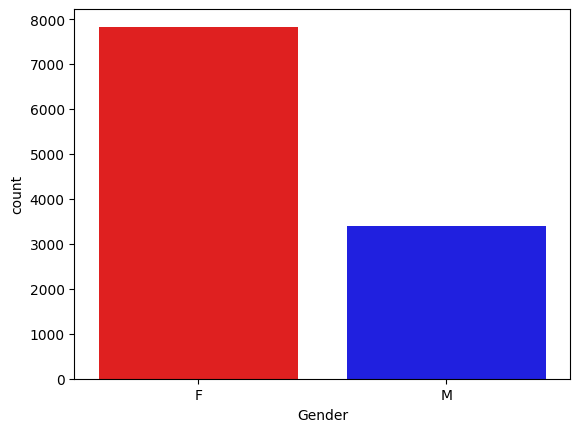

In [24]:
sns.countplot( x = 'Gender', data=df, palette=['red', 'blue'])

<ipython-input-31-8f5be8cc114e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Gender', data=df, palette=['red', 'green'])


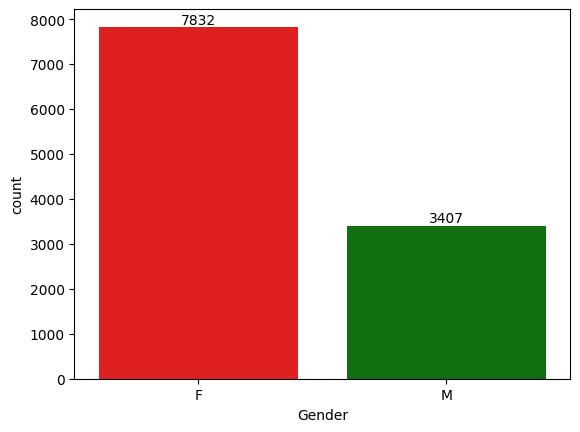

In [31]:
ax=sns.countplot(x='Gender', data=df, palette=['red', 'green'])
for bars in ax.containers:
  ax.bar_label(bars)
  #we have use this code to also get the number of males and female which was missing in above output

**From the above plot we can see that Females have ordered more products as compared to males**

## AGE

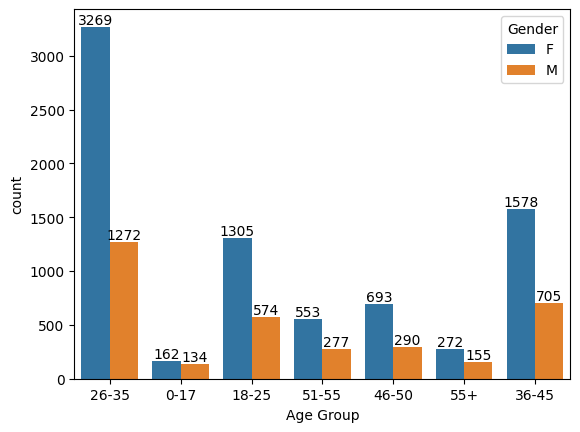

In [32]:
ax=sns.countplot(x='Age Group', data=df, hue='Gender')   #hue is to categorize the bars!!
for bars in ax.containers:
  ax.bar_label(bars)

**As per analysis Age group : 26-35 has more number of purchases within that 'Females' are the ones who have made the most purchases**

### **STATE**

<ipython-input-41-80ec8729e8fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Orders', palette='bright')


<Axes: xlabel='State', ylabel='Orders'>

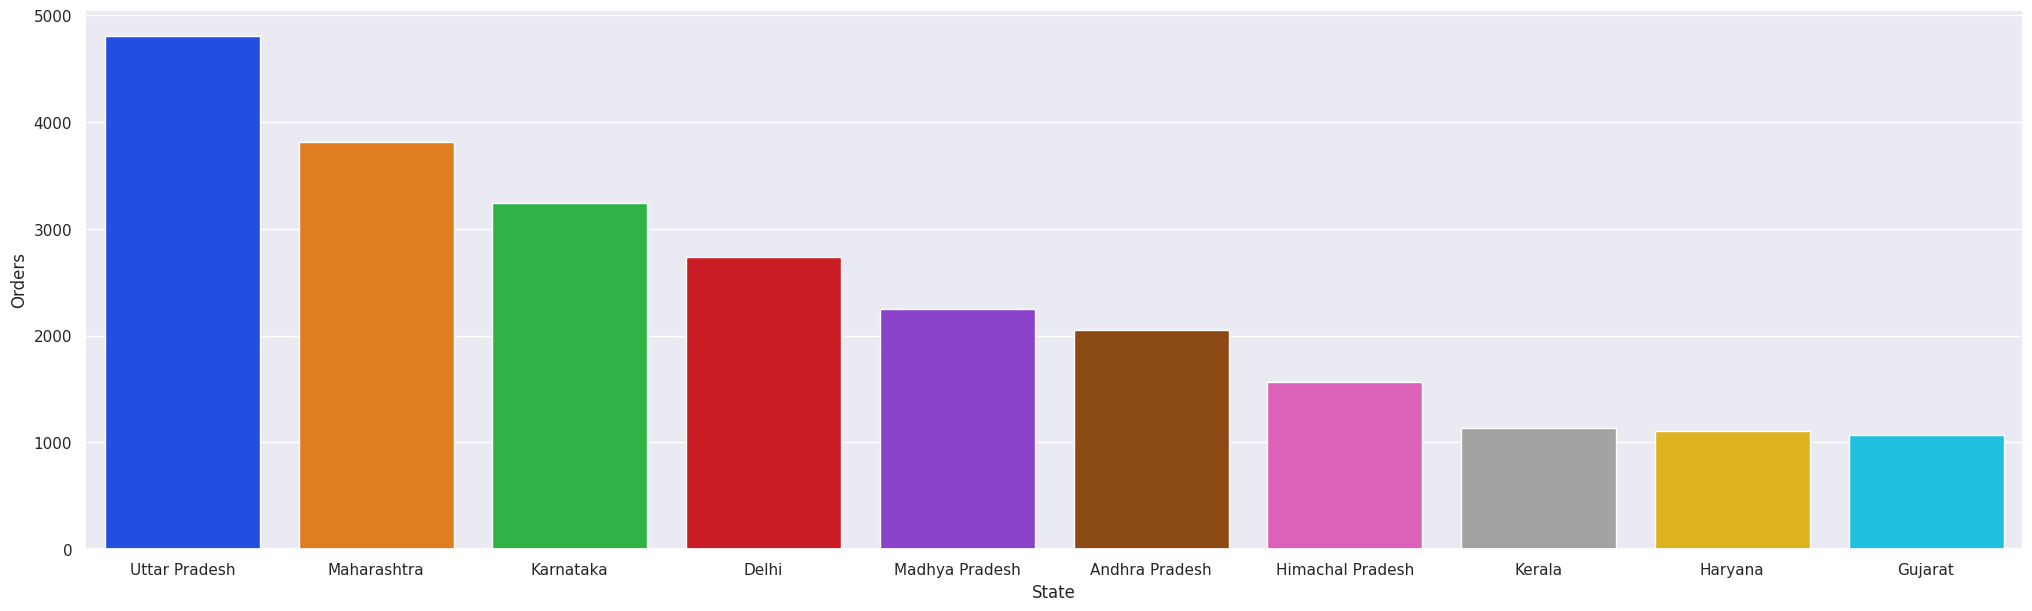

In [41]:
#total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,7)})
sns.barplot(data=sales_state, x='State', y='Orders', palette='bright')

<ipython-input-43-3be3b9f1ae76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_state, x='State', y='Amount', palette='bright')


<Axes: xlabel='State', ylabel='Amount'>

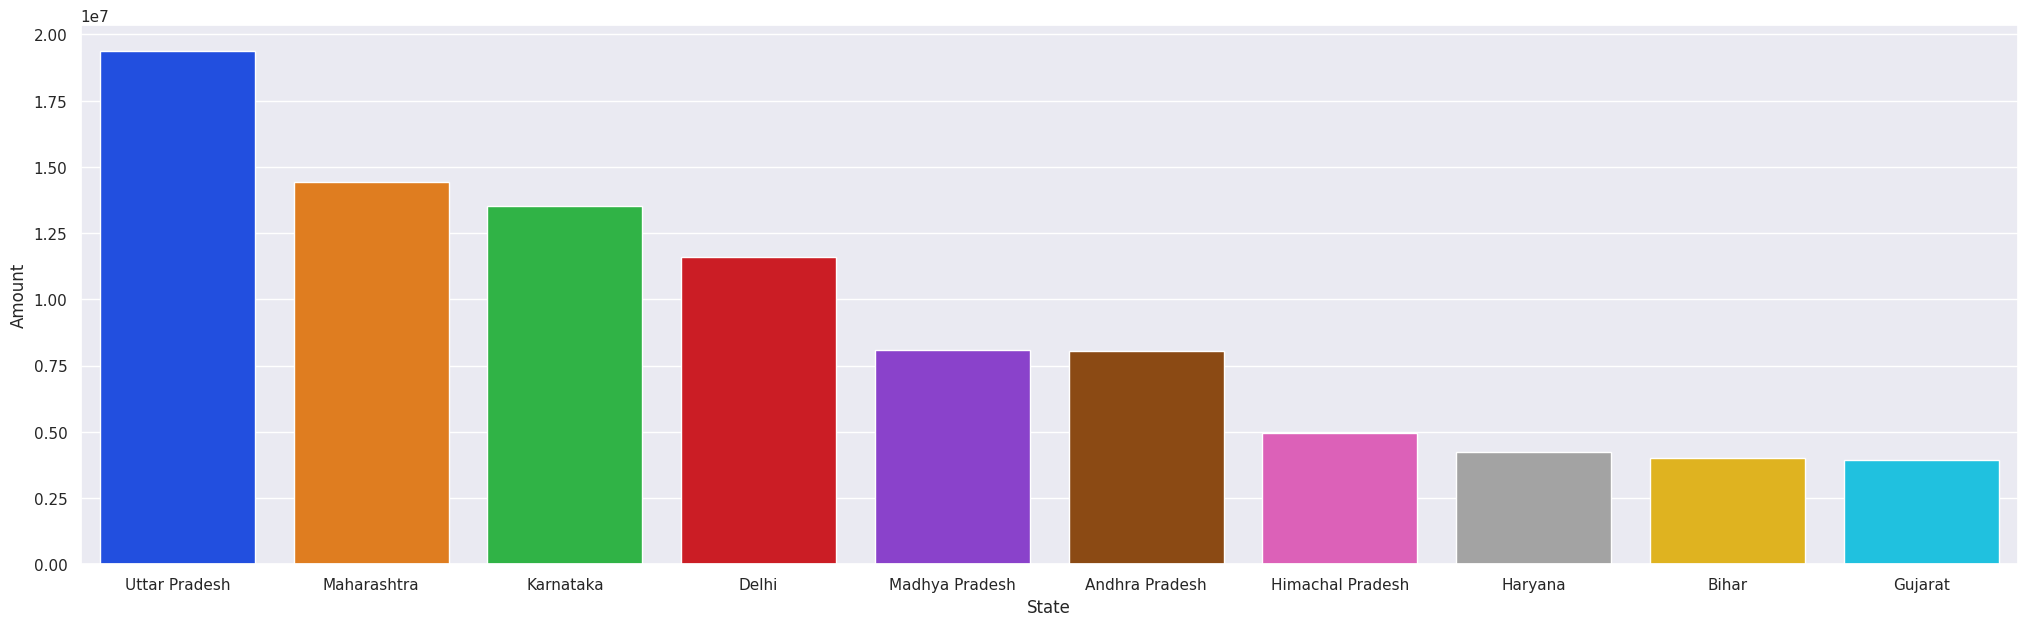

In [43]:
#total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,7)})
sns.barplot(data=sales_state, x='State', y='Amount', palette='bright')

**According to graphs plotted we see that the states- Uttar Pradesh, Maharashtra and Karnataka have done most orders and also have made the lagest amount of sales as compared to other states**

## MARITAL_STATUS

In [51]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-75-65acc1c90235>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x='Marital_Status', palette='bright')


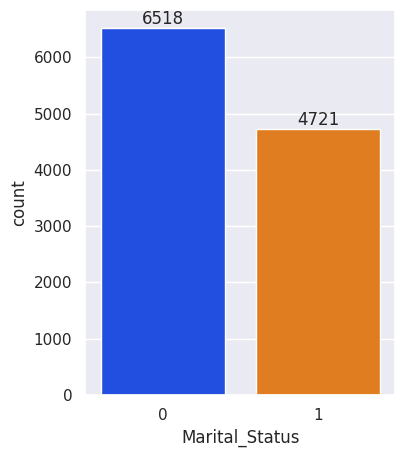

In [75]:
ax= sns.countplot(data=df, x='Marital_Status', palette='bright')
sns.set(rc={"figure.figsize":(2,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

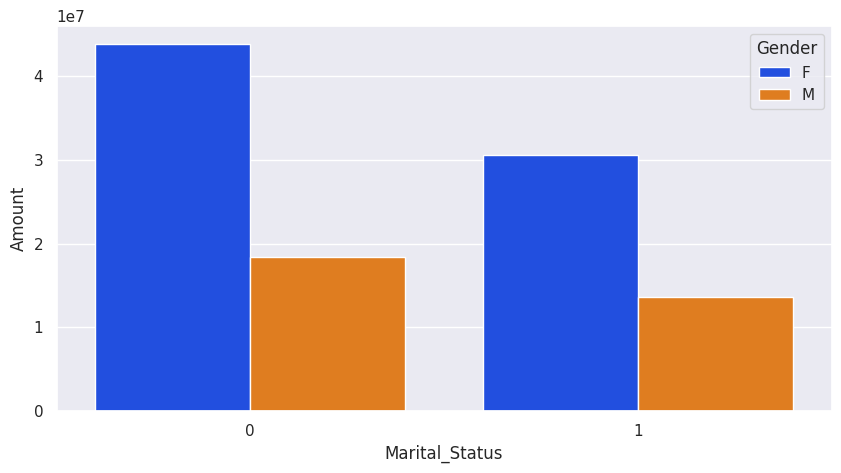

In [76]:
#sales based on marital status
sales_marital_status = df.groupby(['Marital_Status','Gender'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={"figure.figsize":(10,5)})
sns.barplot(data=sales_marital_status, x='Marital_Status', y='Amount', hue='Gender', palette='bright')

**From above graphs we can see that most of the buyers are married(Women) which contriute to most sales**

## PRODUCT CATEGORY

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<ipython-input-103-c44e4c37e5ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=df, x='Product_Category', palette='bright')


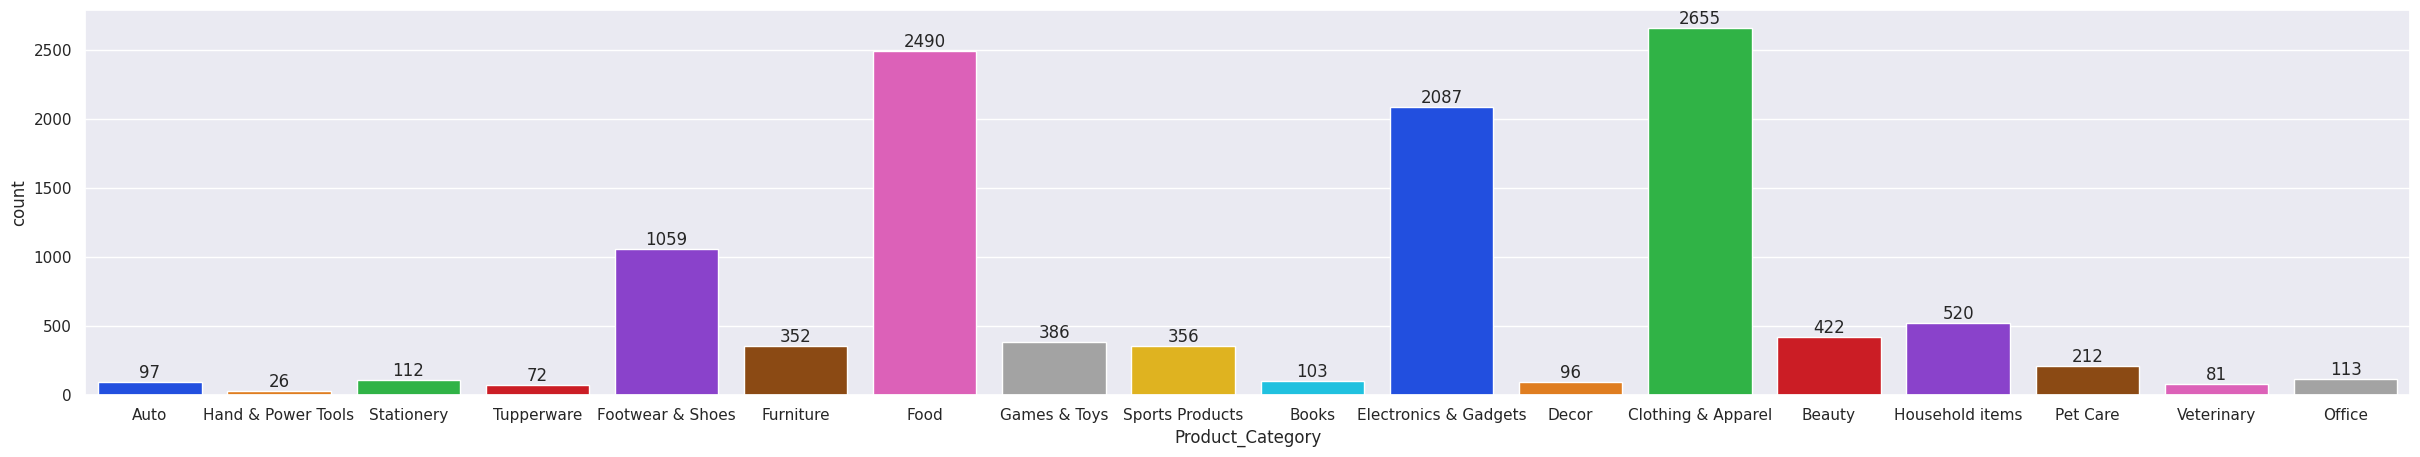

In [103]:
ax= sns.countplot(data=df, x='Product_Category', palette='bright')
sns.set(rc={"figure.figsize":(35,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-72-e9d492688c67>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_product_category, x='Product_Category', y='Amount', palette='bright')


<Axes: xlabel='Product_Category', ylabel='Amount'>

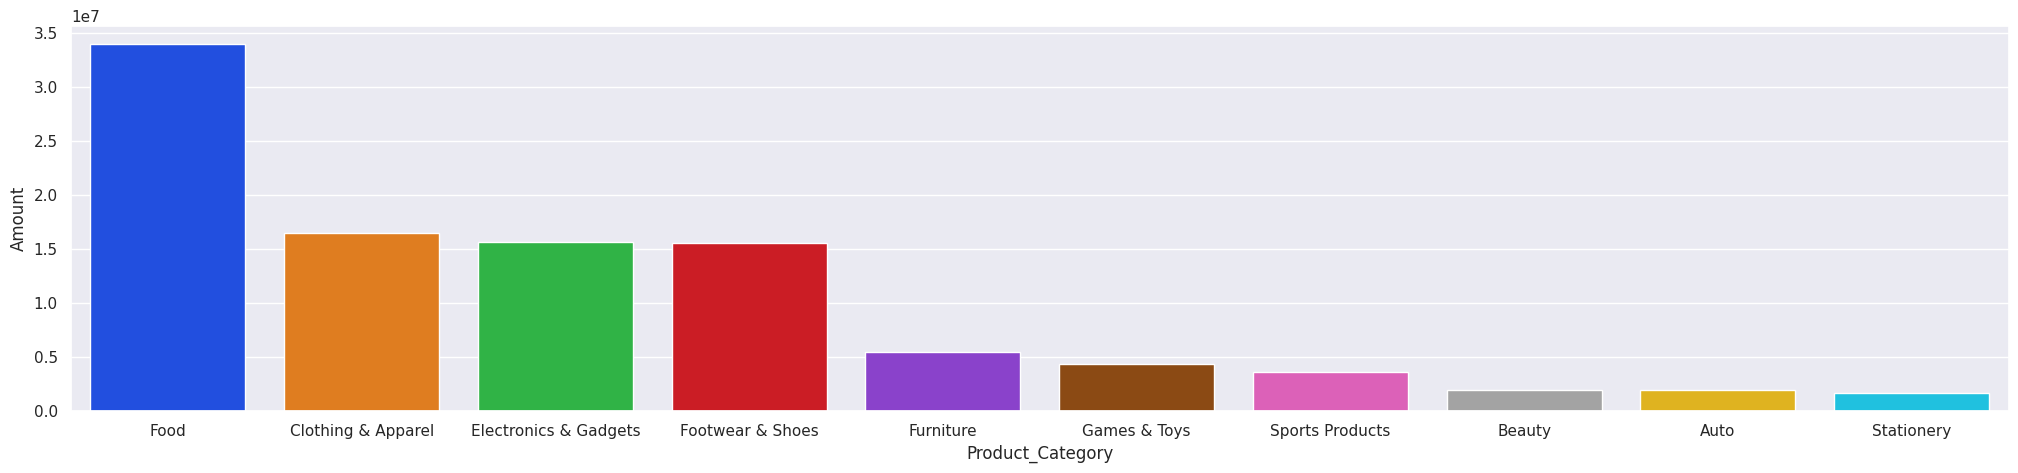

In [72]:
sales_product_category = df.groupby(['Product_Category'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(data=sales_product_category, x='Product_Category', y='Amount', palette='bright')

**According to above plotted charts we can see that 'Clothing & Apparel', 'Food' and 'Electronics & Gadgets' are the top product categories which  have recieved most orders but 'Food' category has contributed more to the revenue of the store as compared to other product categories**

## OCCUPATION

<ipython-input-81-c3ac9ec4717e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Occupation', palette='bright')


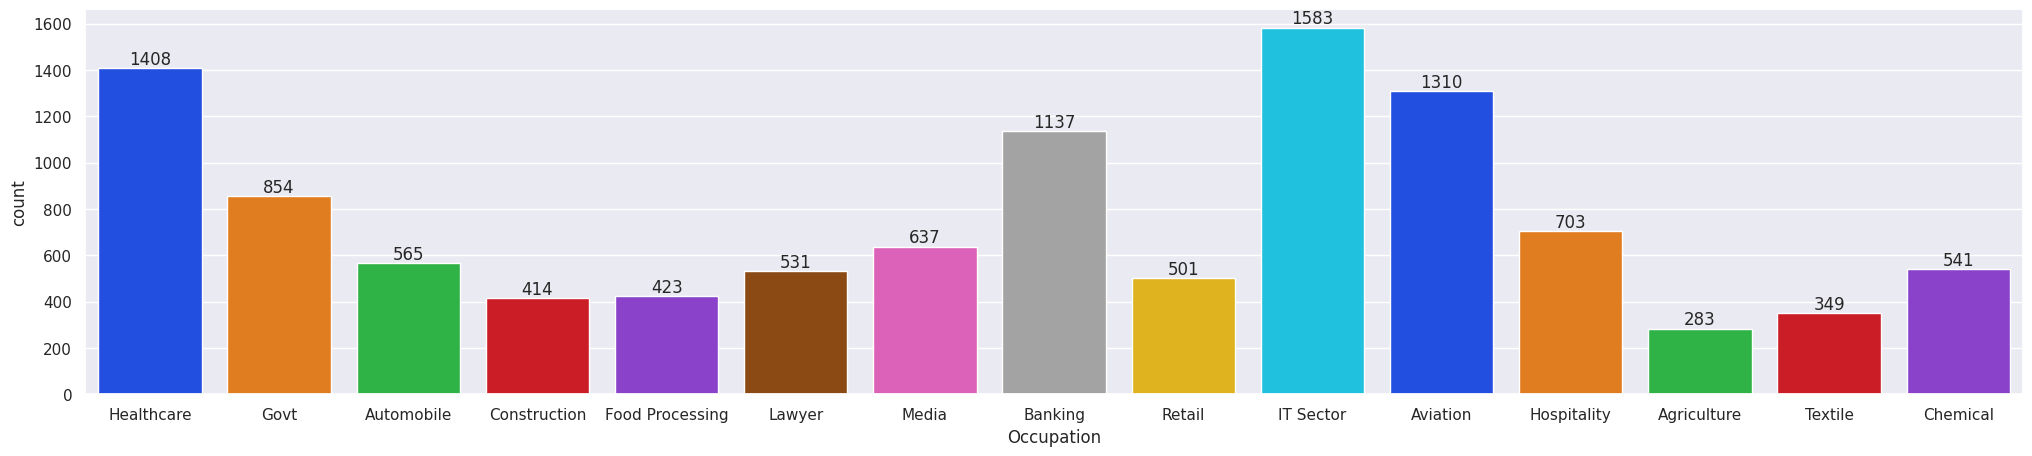

In [81]:
sns.set(rc={"figure.figsize":(25,5)})
ax = sns.countplot(data=df, x='Occupation', palette='bright')
for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-82-61146f10a2a1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_occupation, x='Occupation', y='Amount', palette='bright')


<Axes: xlabel='Occupation', ylabel='Amount'>

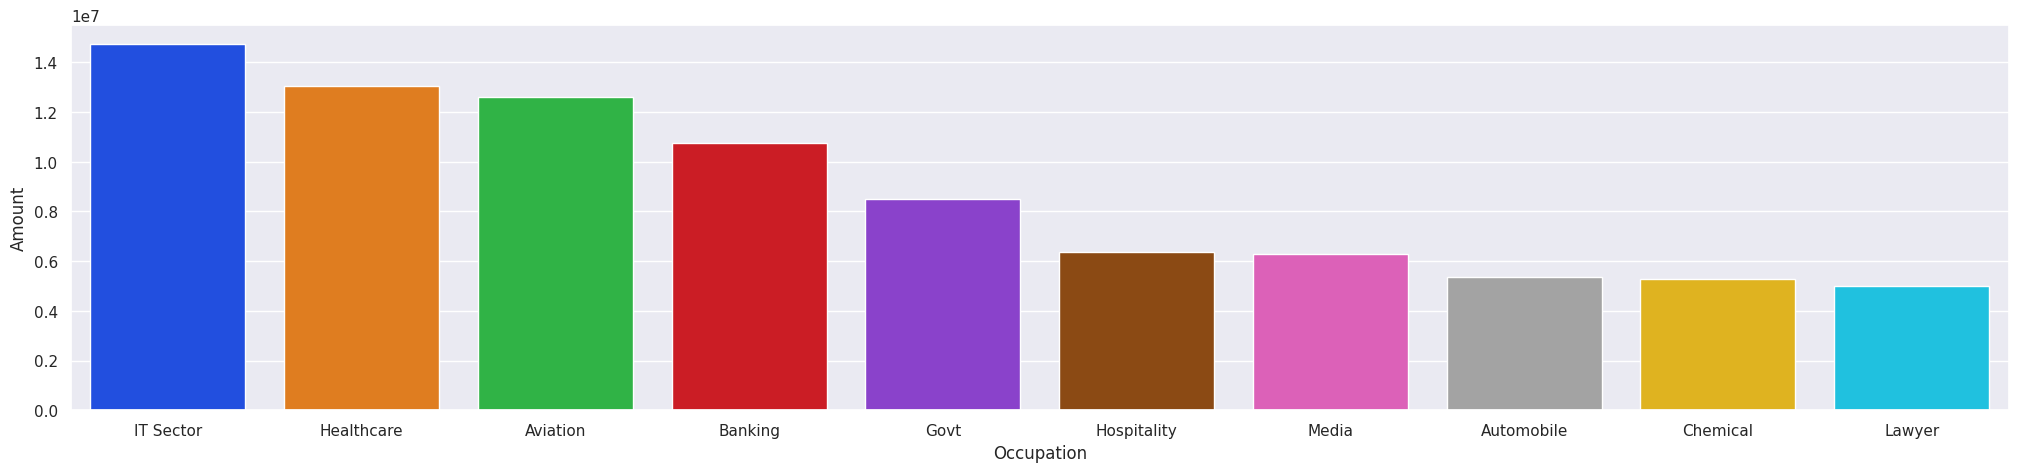

In [82]:
sales_occupation = df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={"figure.figsize":(25,5)})
sns.barplot(data=sales_occupation, x='Occupation', y='Amount', palette='bright')

**We notice that IT SECTOR, HEALTHCARE SECTOR and AVIATION are the three sectors(occupations) in which most of the buyers are working**

## STATE AND ZONE

<ipython-input-84-2ee2e1b06a05>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Zone', palette='bright')


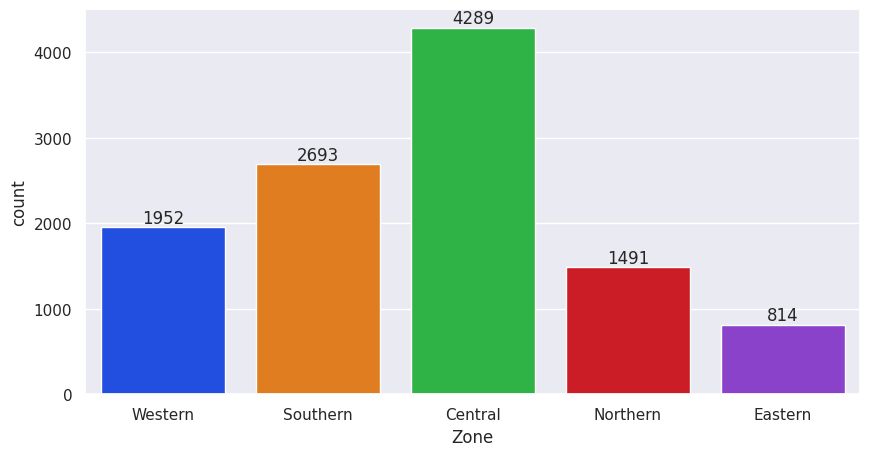

In [84]:
ax = sns.countplot(data=df, x='Zone', palette='bright')
sns.set(rc={"figure.figsize":(7,5)})

for bars in ax.containers:
  ax.bar_label(bars)

<ipython-input-98-d66a85323b50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_zone, x='Zone',y='Amount', palette='bright')


<Axes: xlabel='Zone', ylabel='Amount'>

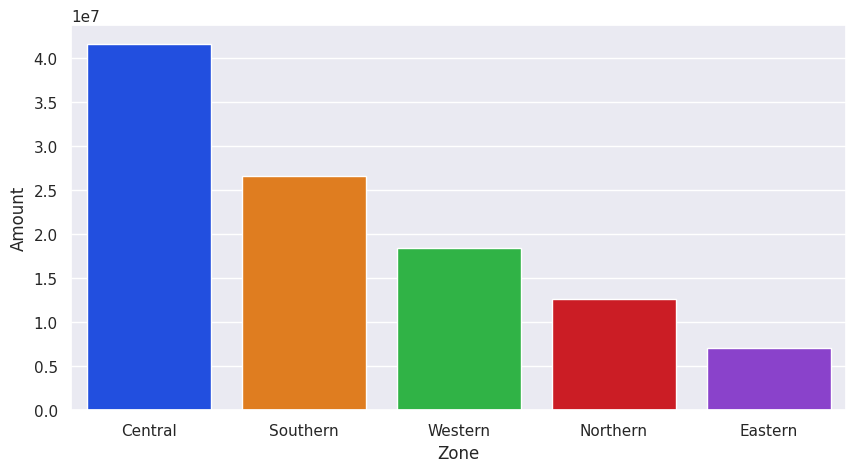

In [98]:
sales_zone = df.groupby(['Zone'],as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={"figure.figsize":(10,5)})
sns.barplot(data=sales_zone, x='Zone',y='Amount', palette='bright')


**From above plotted graphs we come to know that 'Central zone' has contributed to most sales**

# ***CONCLUSION:-***

***We can conclude that married women between age-group: 26-35 from Uttar Pradesh, Maharashtra and Karnataka particularly residing in Central zone of these states, working in IT, Healthcare and Aviation sector are more likely to buy products from Food, Clothing and Electronics category***